<img src='https://miro.medium.com/max/3300/1*yg2DHASe7om_TsIz0E5UuA.png'/>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_colwidth',100)
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
os.chdir('./Dataset/')
from sqlalchemy import create_engine # database connection
import datetime as dt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
# from skmultilearn.adapt import mlknn
# from skmultilearn.problem_transform import ClassifierChain
# from skmultilearn.problem_transform import BinaryRelevance
# from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rushabh6792/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/rushabh6792/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Stack Overflow: Tag Prediction

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2.2 Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3>

In [2]:
#Creating db file from csv
#Learn SQL: https://www.w3schools.com/sql/default.asp
if not os.path.isfile('train.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('Train.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
#         print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

<h3> 3.1.2 Counting the number of rows </h3>

In [3]:
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Number of rows in the database : 
 6034196
Time taken to count the number of rows : 0:01:41.252723


<h3>3.1.3 Checking for duplicates </h3>

In [4]:
#Learn SQl: https://www.w3schools.com/sql/default.asp
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    df_no_dup = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data GROUP BY Title, Body, Tags', con)
    con.close()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the first to genarate train.db file")

Time taken to run this cell : 0:02:49.410350


In [5]:
df_no_dup.head()
# we can observe that there are duplicates

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of Software Testing in a C++ program?,<pre><code>#include&lt;iostream&gt;\n#include&lt;stdlib.h&gt;\n\nusing namespace std;\n\nint mai...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamically at code. I wrote the code as below. When I debug...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamically at code. I wrote the code as below. When I debug...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/servlet/jsp/tagext/TagLibraryValidator,"<p>I followed the guide in <a href=""http://stackoverflow.com/tags/jstl/info"">this link</a> to in...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Driver Manager] Invalid descriptor index,"<p>I use the following code</p>\n\n<pre><code>try {\n Class.forName(""sun.jdbc.odbc.JdbcOdbcDr...",java jdbc,2


In [6]:
print("number of duplicate questions :", num_rows['count(*)'].values[0]- df_no_dup.shape[0], "(",(1-((df_no_dup.shape[0])/(num_rows['count(*)'].values[0])))*100,"% )")

number of duplicate questions : 1827881 ( 30.292038906260256 % )


In [7]:
# number of times each question appeared in our database
df_no_dup.cnt_dup.value_counts()

1    2656284
2    1272336
3     277575
4         90
5         25
6          5
Name: cnt_dup, dtype: int64

In [8]:
df_no_dup[df_no_dup.isnull().any(axis=1)]

,Title,Body,Tags,cnt_dup
777547,Do we really need NULL?,"<blockquote>\n <p><strong>Possible Duplicate:</strong><br>\n <a href=""http://stackoverflow.com...",None,1
962680,Find all values that are not null and not in another table,<p>I am running into a problem which results in an ORA-01722 error. I have a table that contain...,None,1
1126558,Handle NullObjects,<p>I have done quite a bit of research on best ways to deal with null objects.\nThe best I came ...,None,1
1256102,How do Germans call null,"<p>In german null means 0, so how do they call null (like null reference) ?</p>\n",None,1
2430668,Page cannot be null. Please ensure that this operation is being performed in the context of an A...,<p>I get this error when i remove dynamically telerik raddock and raddock zone controls and add...,None,1
3329908,"What is the difference between NULL and ""0""?","<p>What is the difference from NULL and ""0""?</p>\n\n<p>Example:</p>\n\n<pre><code>return NULL;\n...",None,1
3551595,a bit of difference between null and space,<p>I was just reading this quote</p>\n\n<blockquote>\n <p>And don't tell me there isn't one bit...,None,2


In [9]:
df_no_dup = df_no_dup[~df_no_dup.isnull().any(axis=1)]

In [10]:
start = datetime.now()
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(lambda text: len(text.split(" ")))
# adding a new feature number of tags per question
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head()

Time taken to run this cell : 0:00:03.162973


,Title,Body,Tags,cnt_dup,tag_count
0,Implementing Boundary Value Analysis of Software Testing in a C++ program?,<pre><code>#include&lt;iostream&gt;\n#include&lt;stdlib.h&gt;\n\nusing namespace std;\n\nint mai...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamically at code. I wrote the code as below. When I debug...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamically at code. I wrote the code as below. When I debug...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/servlet/jsp/tagext/TagLibraryValidator,"<p>I followed the guide in <a href=""http://stackoverflow.com/tags/jstl/info"">this link</a> to in...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Driver Manager] Invalid descriptor index,"<p>I use the following code</p>\n\n<pre><code>try {\n Class.forName(""sun.jdbc.odbc.JdbcOdbcDr...",java jdbc,2,2


In [11]:
# distribution of number of tags per question
df_no_dup.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568291
5     505158
Name: tag_count, dtype: int64

In [12]:
#Creating a new database with no duplicates
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)

In [13]:
#This method seems more appropriate to work with this much data.
#creating the connection with database file.
if os.path.isfile('train_no_dup.db'):
    start = datetime.now()
    con = sqlite3.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", con)
    #Always remember to close the database
    con.close()

    # Let's now drop unwanted column.
    tag_data.drop(tag_data.index[0], inplace=True)
    #Printing first 5 columns from our data frame
    tag_data.head()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")

Time taken to run this cell : 0:00:50.063605


<h2> 3.2 Analysis of Tags </h2>

<h3> 3.2.1 Total number of unique tags </h3>

In [14]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])

In [15]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206307
Number of unique tags : 42048


In [16]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']


<h3> 3.2.3 Number of times a tag appeared </h3>

In [17]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [18]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,hyper-v-server-2008-r2,223
1,rmail,2
2,django-generic-views,109
3,asm.js,1
4,menhir,1


In [19]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

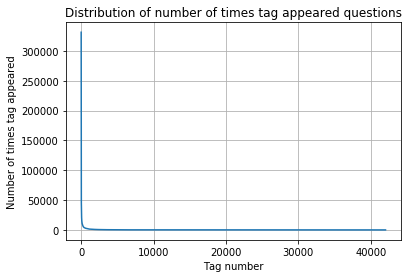

In [20]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

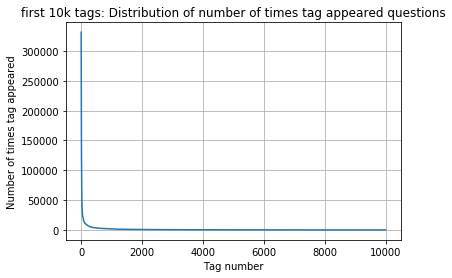

400 [331505  44829  22429  17728  13364  11162  10029   9148   8054   7151
   6466   5865   5370   4983   4526   4281   4144   3929   3750   3593
   3453   3299   3123   2986   2891   2738   2647   2527   2431   2331
   2259   2186   2097   2020   1959   1900   1828   1770   1723   1673
   1631   1574   1532   1479   1448   1406   1365   1328   1300   1266
   1245   1222   1197   1181   1158   1139   1121   1101   1076   1056
   1038   1023   1006    983    966    952    938    926    911    891
    882    869    856    841    830    816    804    789    779    770
    752    743    733    725    712    702    688    678    671    658
    650    643    634    627    616    607    598    589    583    577
    568    559    552    545    540    533    526    518    512    506
    500    495    490    485    480    477    469    465    457    450
    447    442    437    432    426    422    418    413    408    403
    398    393    388    385    381    378    374    370    367    365
  

In [21]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

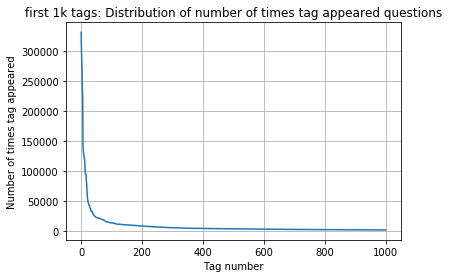

200 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483
   3453   3427   3396   3363   3326   3299   3272   3232   3196   3168
   3123   3094   3073   3050   3012   2986   2983   2953   2934   2903
   2891   2844   2819   2784   2754   2738   2726   2708   2681   2669
   2647   2621   2604   2594   2556   2527   2510   2482   2460   2444
  

In [22]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

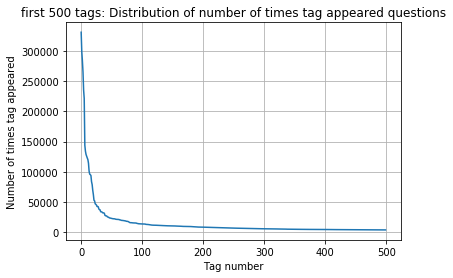

100 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483]


In [23]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

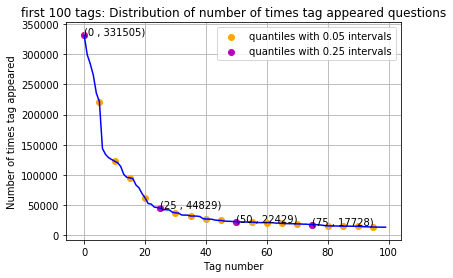

20 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703]


In [24]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [25]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

<h3> 3.2.4 Tags Per Question </h3>

In [26]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and we are converting this to [3, 4, 2, 2, 3]
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 4206307 datapoints.
[3, 4, 2, 2, 3]


In [27]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.899443


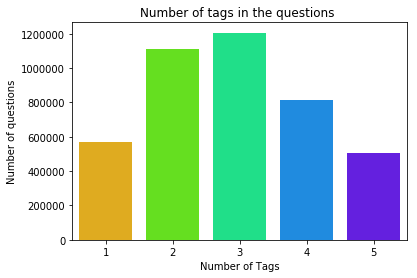

In [28]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

<h3>3.2.5 Most Frequent Tags </h3>

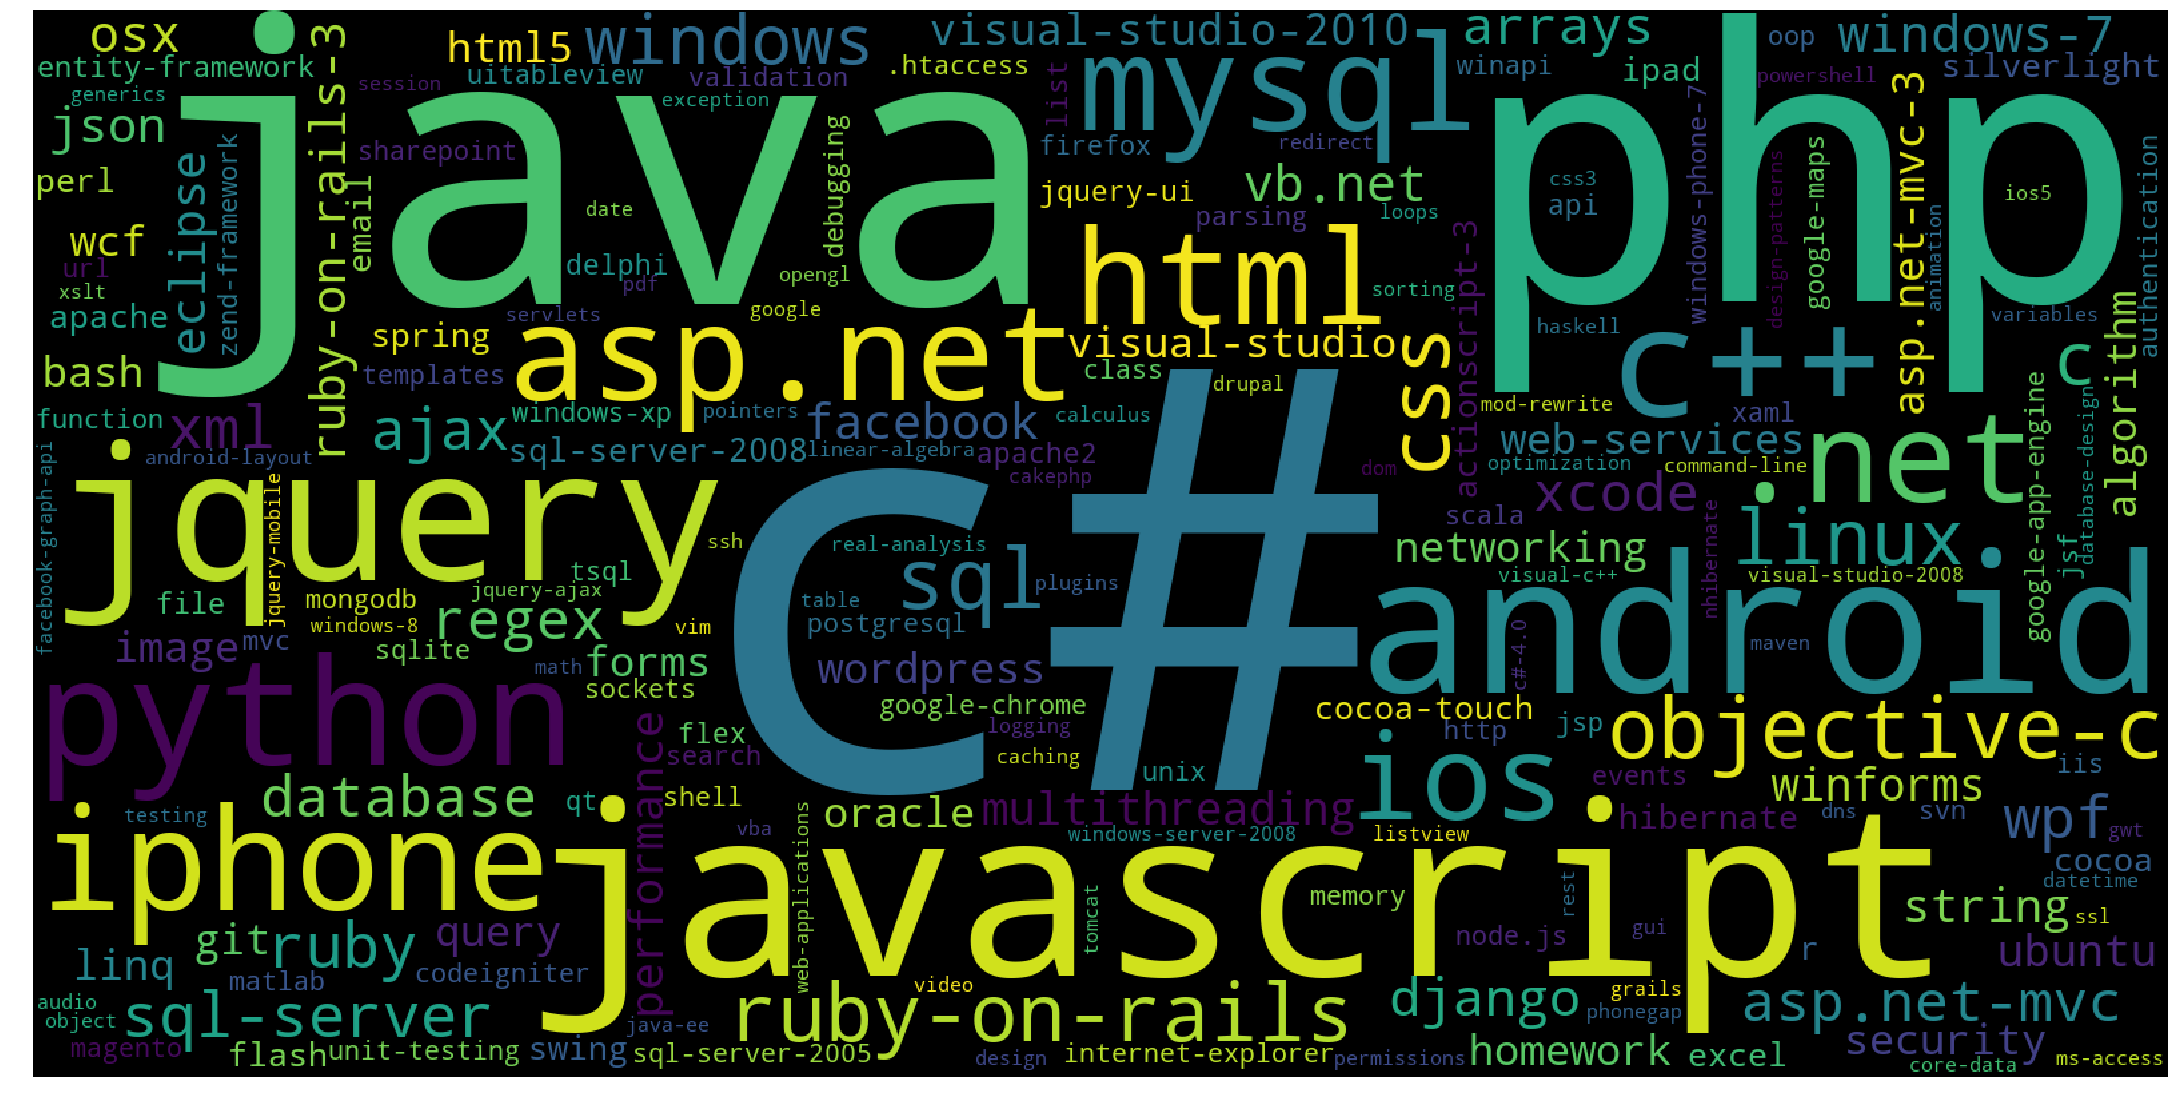

Time taken to run this cell : 0:00:04.672499


In [29]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 20 tags </h3>

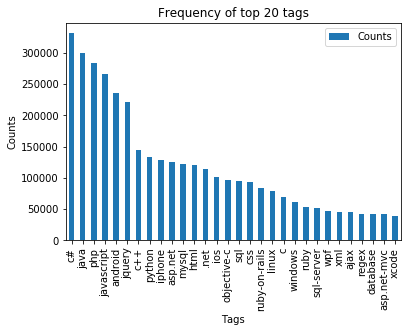

In [30]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> 3.3 Cleaning and preprocessing of Questions </h3>

<h3> 3.3.1 Preprocessing </h3>

<ol> 
    <li> Sample 1M data points </li>
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [31]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [32]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [33]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 100000;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

Tables in the databse:
QuestionsProcessed
Cleared All the rows
Time taken to run this cell : 0:00:30.674447


__ we create a new data base to store the sampled and preprocessed questions __

In [34]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/

start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

Avg. length of questions(Title+Body) before processing: 1173
Avg. length of questions(Title+Body) after processing: 327
Percent of questions containing code: 57
Time taken to run this cell : 0:02:25.423838


In [35]:
# dont forget to close the connections, or else you will end up with locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [36]:
#Taking 1 Million entries to a dataframe.
write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
    conn_r.commit()
    conn_r.close()

Questions after preprocessed
('check variabl type primit mayb question bit stupid know check variabl primit java like thank',)
----------------------------------------------------------------------------------------------------
('net missingmethodexcept occur one thousand end user machin insight issu baffl affect singl user knowledg reproduc us user receiv missingmethodexcept trace file indic occur creat new instanc compon call initi setup method prepar work initializeworkerbyargu exampl method specifi error interfac method base class implement class deriv base class overrid need user latest releas applic provid code ship within singl assembl distil version compon',)
----------------------------------------------------------------------------------------------------
('updat listview delet oper display data pull android os sqlite databas success get item delet click howev issu refresh updat listview oper code delet contact updatelist method includ method three way tri refresh none work 

In [37]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
    conn_r.commit()
    conn_r.close()

In [38]:
preprocessed_data.head()

,question,tags
0,inherit parent constructor argument brows discuss similar topic find situat tri call parent cons...,javascript inheritance constructor arguments
1,check variabl type primit mayb question bit stupid know check variabl primit java like thank,python
2,net missingmethodexcept occur one thousand end user machin insight issu baffl affect singl user ...,.net exception missingmethodexception
3,updat listview delet oper display data pull android os sqlite databas success get item delet cli...,android sqlite android-listview
4,specifi visual studio instal condit visual studio instal project want instal creat specif folder...,visual-studio-2008 windows-installer


In [39]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 99999
number of dimensions : 2


<h1>4. Machine Learning Models </h1>

In [40]:
global_report = pd.DataFrame(columns=['Vectorizer', 'Model', 'NGram', 'Parameter', 'Precision', 'Recall', 'F1_Score_Micro'])

<h2> 4.1 Converting tags for multilabel problems </h2>

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [41]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

__ We will sample the number of tags instead considering all of them (due to limitation of computing power) __

In [42]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [43]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

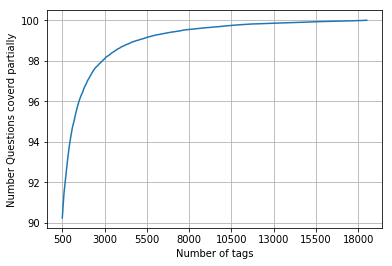

with  5500 tags we are covering  99.154 % of questions


In [44]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [45]:
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_qs)

number of questions that are not covered : 846 out of  99999


In [46]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 18587
number of tags taken : 5500 ( 29.59057405713671 %)


__ We consider top 15% tags which covers  99% of the questions __

<h2>4.2 Split the data into test and train (80:20) </h2>

In [47]:
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [48]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (79999, 5500)
Number of data points in test data : (20000, 5500)


<h2>4.3 Featurizing data </h2>

In [49]:
# start = datetime.now()
# vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
#                              tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
# x_train_multilabel = vectorizer.fit_transform(x_train['question'])
# x_test_multilabel = vectorizer.transform(x_test['question'])
# print("Time taken to run this cell :", datetime.now() - start)

In [50]:
# print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
# print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

In [51]:
# https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/
#https://stats.stackexchange.com/questions/117796/scikit-multi-label-classification
# classifier = LabelPowerset(GaussianNB())
"""
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=21)

# train
classifier.fit(x_train_multilabel, y_train)

# predict
predictions = classifier.predict(x_test_multilabel)
print(accuracy_score(y_test,predictions))
print(metrics.f1_score(y_test, predictions, average = 'macro'))
print(metrics.f1_score(y_test, predictions, average = 'micro'))
print(metrics.hamming_loss(y_test,predictions))

"""
# we are getting memory error because the multilearn package 
# is trying to convert the data into dense matrix
# ---------------------------------------------------------------------------
#MemoryError                               Traceback (most recent call last)
#<ipython-input-170-f0e7c7f3e0be> in <module>()
#----> classifier.fit(x_train_multilabel, y_train)

"\nfrom skmultilearn.adapt import MLkNN\nclassifier = MLkNN(k=21)\n\n# train\nclassifier.fit(x_train_multilabel, y_train)\n\n# predict\npredictions = classifier.predict(x_test_multilabel)\nprint(accuracy_score(y_test,predictions))\nprint(metrics.f1_score(y_test, predictions, average = 'macro'))\nprint(metrics.f1_score(y_test, predictions, average = 'micro'))\nprint(metrics.hamming_loss(y_test,predictions))\n\n"

<h2> 4.4 Applying Logistic Regression with OneVsRest Classifier </h2>

In [52]:
# # this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# # This takes about 6-7 hours to run.
# classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
# classifier.fit(x_train_multilabel, y_train)
# predictions = classifier.predict(x_test_multilabel)

# print("accuracy :",metrics.accuracy_score(y_test,predictions))
# print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
# print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
# print("hamming loss :",metrics.hamming_loss(y_test,predictions))
# print("Precision recall report :\n",metrics.classification_report(y_test, predictions))


In [53]:
# from sklearn.externals import joblib
# joblib.dump(classifier, 'lr_with_equal_weight.pkl') 

<h2> 4.5 Modeling with less data points (0.15M data points) and more weight to title and 500 tags only. </h2>

In [54]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [55]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table

read_db = 'train_no_dup.db'
write_db = 'Titlemoreweight.db'
# train_datasize = 100000
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        # for selecting first 0.5M rows
        reader.execute("SELECT Title, Body, Tags From no_dup_train LIMIT 150001;")
        # for selecting random points
        #reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 500001;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")

Tables in the databse:
QuestionsProcessed
Cleared All the rows


<h3> 4.5.1 Preprocessing of questions </h3>

<ol> 
    <li> Separate Code from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> <b> Give more weightage to title : Add title three times to the question </b> </li>
   
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [56]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    
#     if questions_proccesed<=train_datasize:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question+" "+str(tags)
#     else:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100000
Avg. length of questions(Title+Body) before processing: 1222
Avg. length of questions(Title+Body) after processing: 430
Percent of questions containing code: 57
Time taken to run this cell : 0:05:33.648006


In [57]:
# never forget to close the conections or else we will end up with database locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

__ Sample quesitons after preprocessing of data __

In [58]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('dynam datagrid bind silverlight dynam datagrid bind silverlight dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem bind correct grid come column form come grid column although necessari bind nthank repli advance..',)
----------------------------------------------------------------------------------------------------
('java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid follow guid link instal jstl got follow error tri launch jsp page java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid taglib declar instal jstl 1.1 tomcat webapp tri project work also tri version 1.2 jstl still messag caus solv',)
----------------------------------------------------------------------------------------------------
('java.sql.sqlexcept microsoft odbc driver

__ Saving Preprocessed data to a Database __

In [59]:
#Taking 0.5 Million entries to a dataframe.
write_db = 'Titlemoreweight.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [60]:
preprocessed_data.head()

,question,tags
0,dynam datagrid bind silverlight dynam datagrid bind silverlight dynam datagrid bind silverlight ...,c# silverlight data-binding
1,dynam datagrid bind silverlight dynam datagrid bind silverlight dynam datagrid bind silverlight ...,c# silverlight data-binding columns
2,java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffoun...,jsp jstl
3,java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index java.sql.sqlexcept micro...,java jdbc
4,better way updat feed fb php sdk better way updat feed fb php sdk better way updat feed fb php s...,facebook api facebook-php-sdk


In [61]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 150000
number of dimensions : 2


__ Converting string Tags to multilable output variables __ 

In [62]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

__ Selecting 500 Tags __

In [63]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

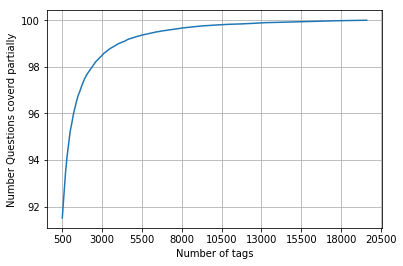

with  5500 tags we are covering  99.363 % of questions
with  500 tags we are covering  91.515 % of questions


In [64]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [65]:
# we will be taking 500 tags
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 12728 out of  150000


In [66]:
preprocessed_data.shape

(150000, 2)

In [67]:
train_datasize=120000
x_train=preprocessed_data.head(train_datasize)
x_test=preprocessed_data.tail(preprocessed_data.shape[0] - train_datasize)

y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:preprocessed_data.shape[0],:]

In [68]:
print("Number of data points in y train data :", y_train.shape)
print("Number of data points in y test data :", y_test.shape)
print("Number of data points in x train data :", x_train.shape)
print("Number of data points in x test data :", x_test.shape)

Number of data points in y train data : (120000, 500)
Number of data points in y test data : (30000, 500)
Number of data points in x train data : (120000, 2)
Number of data points in x test data : (30000, 2)


<h3> 4.5.2 Featurizing data with TfIdf vectorizer </h3>

In [69]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:01:49.784085


In [70]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (120000, 101362) Y : (120000, 500)
Dimensions of test data X: (30000, 101362) Y: (30000, 500)


<h3> 4.5.3 Applying Logistic Regression with OneVsRest Classifier </h3>

In [71]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')

global_report = global_report.append({
                        'Vectorizer': 'Tf-IDF',
                        'Model': 'Logistic Regression (SGD with log loss)', 
                        'NGram': '(1,3)', 
                        'Parameter': 0.00001,
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1_Score_Micro':f1
                     },
                    ignore_index=True)
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))



print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.2045
Hamming loss  0.0030292
Micro-average quality numbers
Precision: 0.7131, Recall: 0.3144, F1-measure: 0.4364
Macro-average quality numbers
Precision: 0.5388, Recall: 0.2350, F1-measure: 0.3075
              precision    recall  f1-score   support

           0       0.80      0.32      0.45      1111
           1       0.73      0.17      0.28      2052
           2       0.67      0.36      0.47      2388
           3       0.75      0.50      0.60      2226
           4       0.82      0.43      0.57      2014
           5       0.57      0.11      0.18       642
           6       0.83      0.35      0.49      1756
           7       0.93      0.62      0.74      1690
           8       0.65      0.19      0.29       341
           9       0.78      0.77      0.78      2344
          10       0.68      0.35      0.46       821
          11       0.57      0.21      0.30      1143
          12       0.85      0.32      0.46       768
          13       0.64      0.26

In [72]:
start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))


precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')

global_report = global_report.append({
                        'Vectorizer': 'Tf-IDF',
                        'Model': 'Logistic Regression', 
                        'NGram': '(1,3)', 
                        'Parameter': 1,
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1_Score_Micro':f1
                     },
                    ignore_index=True)
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.21033333333333334
Hamming loss  0.003007
Micro-average quality numbers
Precision: 0.7086, Recall: 0.3293, F1-measure: 0.4496
Macro-average quality numbers
Precision: 0.5460, Recall: 0.2565, F1-measure: 0.3290
              precision    recall  f1-score   support

           0       0.80      0.33      0.47      1111
           1       0.71      0.19      0.30      2052
           2       0.68      0.36      0.47      2388
           3       0.75      0.50      0.60      2226
           4       0.82      0.44      0.57      2014
           5       0.57      0.12      0.19       642
           6       0.83      0.35      0.49      1756
           7       0.93      0.65      0.77      1690
           8       0.64      0.19      0.30       341
           9       0.78      0.78      0.78      2344
          10       0.68      0.36      0.47       821
          11       0.58      0.22      0.31      1143
          12       0.84      0.33      0.47       768
          13       0.

<h3> 4.5.4 Featurizing data with BoW vectorizer </h3>

In [73]:
start = datetime.now()
vectorizer_bow = CountVectorizer(min_df=0.00009, max_features=200000, \
                             tokenizer = lambda x: x.split(), ngram_range=(1,4))
x_train_multilabel_bow = vectorizer_bow.fit_transform(x_train['question'])
x_test_multilabel_bow = vectorizer_bow.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:03:25.682941


In [74]:
print("Dimensions of train data X:",x_train_multilabel_bow.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel_bow.shape,"Y:",y_test.shape)

Dimensions of train data X: (120000, 102634) Y : (120000, 500)
Dimensions of test data X: (30000, 102634) Y: (30000, 500)


<h3> 4.5.5 Applying Logistic Regression with OneVsRest Classifier </h3>

In [75]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
classifier.fit(x_train_multilabel_bow, y_train)
predictions = classifier.predict (x_test_multilabel_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')

global_report = global_report.append({
                        'Vectorizer': 'BoW',
                        'Model': 'Logistic Regression (SGD with log loss)', 
                        'NGram': '(1,4)', 
                        'Parameter': 0.00001,
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1_Score_Micro':f1
                     },
                    ignore_index=True)
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.0765
Hamming loss  0.007617333333333334
Micro-average quality numbers
Precision: 0.2297, Recall: 0.4427, F1-measure: 0.3024
Macro-average quality numbers
Precision: 0.1552, Recall: 0.3670, F1-measure: 0.2071
              precision    recall  f1-score   support

           0       0.35      0.45      0.39      1111
           1       0.32      0.37      0.34      2052
           2       0.43      0.48      0.45      2388
           3       0.52      0.60      0.56      2226
           4       0.46      0.55      0.50      2014
           5       0.12      0.22      0.16       642
           6       0.41      0.49      0.44      1756
           7       0.68      0.73      0.71      1690
           8       0.22      0.31      0.26       341
           9       0.66      0.74      0.70      2344
          10       0.38      0.45      0.41       821
          11       0.27      0.33      0.30      1143
          12       0.39      0.47      0.43       768
          13       0.2

In [76]:
start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l1'))
classifier_2.fit(x_train_multilabel_bow, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel_bow)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))


precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')

global_report = global_report.append({
                        'Vectorizer': 'BoW',
                        'Model': 'Logistic Regression', 
                        'NGram': '(1,4)', 
                        'Parameter': 1,
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1_Score_Micro':f1
                     },
                    ignore_index=True)
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.18633333333333332
Hamming loss  0.003399333333333333
Micro-average quality numbers
Precision: 0.5644, Recall: 0.3887, F1-measure: 0.4604
Macro-average quality numbers
Precision: 0.4320, Recall: 0.3112, F1-measure: 0.3527
              precision    recall  f1-score   support

           0       0.61      0.40      0.48      1111
           1       0.47      0.30      0.36      2052
           2       0.54      0.42      0.47      2388
           3       0.66      0.56      0.60      2226
           4       0.66      0.50      0.57      2014
           5       0.30      0.14      0.19       642
           6       0.64      0.41      0.50      1756
           7       0.89      0.72      0.79      1690
           8       0.55      0.24      0.34       341
           9       0.77      0.78      0.78      2344
          10       0.57      0.40      0.47       821
          11       0.43      0.29      0.34      1143
          12       0.64      0.40      0.49       768
         

<h3> 4.5.6 Applying Hyperparameter tuning using GridSearch Logistic Regression with OneVsRest Classifier </h3>

In [77]:
start = datetime.now()
parameters = {'estimator__alpha': [10**i for i in range(-6, 4, 1)]}
classifier = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1'), n_jobs=-1)
g_clf = GridSearchCV(classifier, parameters, n_jobs=-1, verbose=50, scoring='f1_micro', cv=5)
g_clf.fit(x_train_multilabel_bow, y_train)
predictions = g_clf.predict (x_test_multilabel_bow)

print("Optimal Parameters: ", g_clf.best_params_)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')

global_report = global_report.append({
                        'Vectorizer': 'BoW',
                        'Model': 'Logistic Regression (SGD with log loss) - Hypertuned', 
                        'NGram': '(1,4)', 
                        'Parameter': g_clf.best_params_['estimator__alpha'],
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1_Score_Micro':f1
                     },
                    ignore_index=True)
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 96.6min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 107.5min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 118.8min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 121.6min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 127.4min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 128.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 141.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 170.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 180.5min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 186.8min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 188.8min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 201.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | 

<h3> 4.5.7 Applying Linear SVM with OneVsRest Classifier - TFIDF Vectorizer </h3>

In [78]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')

global_report = global_report.append({
                        'Vectorizer': 'Tf-IDF',
                        'Model': 'Linear SVM (SGD with hinge loss)', 
                        'NGram': '(1,3)', 
                        'Parameter': 0.00001,
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1_Score_Micro':f1
                     },
                    ignore_index=True)
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.21893333333333334
Hamming loss  0.0029227333333333334
Micro-average quality numbers
Precision: 0.7923, Recall: 0.2934, F1-measure: 0.4282
Macro-average quality numbers
Precision: 0.4256, Recall: 0.2180, F1-measure: 0.2638
              precision    recall  f1-score   support

           0       0.80      0.35      0.49      1111
           1       0.73      0.14      0.24      2052
           2       0.78      0.28      0.42      2388
           3       0.82      0.45      0.58      2226
           4       0.84      0.42      0.56      2014
           5       0.61      0.14      0.23       642
           6       0.81      0.35      0.49      1756
           7       0.93      0.71      0.80      1690
           8       0.71      0.20      0.32       341
           9       0.77      0.87      0.82      2344
          10       0.70      0.32      0.44       821
          11       0.73      0.01      0.03      1143
          12       0.85      0.33      0.48       768
        

<h3> 4.5.8 Applying Linear SVM with OneVsRest Classifier BOW Vectorizer </h3>

In [80]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel_bow, y_train)
predictions = classifier.predict (x_test_multilabel_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')

global_report = global_report.append({
                        'Vectorizer': 'BoW',
                        'Model': 'Linear SVM (SGD with hinge loss)', 
                        'NGram': '(1,4)', 
                        'Parameter': 0.00001,
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1_Score_Micro':f1
                     },
                    ignore_index=True)
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.07953333333333333
Hamming loss  0.007597533333333333
Micro-average quality numbers
Precision: 0.2304, Recall: 0.4430, F1-measure: 0.3032
Macro-average quality numbers
Precision: 0.1532, Recall: 0.3646, F1-measure: 0.2044
              precision    recall  f1-score   support

           0       0.33      0.48      0.39      1111
           1       0.32      0.38      0.35      2052
           2       0.43      0.49      0.46      2388
           3       0.52      0.59      0.55      2226
           4       0.49      0.55      0.52      2014
           5       0.12      0.19      0.15       642
           6       0.44      0.47      0.45      1756
           7       0.71      0.79      0.74      1690
           8       0.16      0.30      0.21       341
           9       0.68      0.74      0.71      2344
          10       0.40      0.45      0.42       821
          11       0.26      0.35      0.30      1143
          12       0.37      0.48      0.42       768
         

<h3> 4.5.9 Applying Hyperparameter tuning using GridSearch Logistic Regression(LR) with OneVsRest Classifier </h3>

In [82]:
start = datetime.now()
parameters = {'estimator__C': [10**i for i in range(-6, 4, 1)]}
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1'))
g_clf = GridSearchCV(classifier, parameters, n_jobs=-1, verbose=50, scoring='f1_micro', cv=5)
g_clf.fit(x_train_multilabel_bow, y_train)
predictions = g_clf.predict (x_test_multilabel_bow)

print("Optimal Parameters: ", g_clf.best_params_)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')

global_report = global_report.append({
                        'Vectorizer': 'BoW',
                        'Model': 'Logistic Regression - Hypertuned', 
                        'NGram': '(1,4)', 
                        'Parameter': g_clf.best_params_['estimator__C'],
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1_Score_Micro':f1
                     },
                    ignore_index=True)
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 25.

<h1> Conclusions</h1>

In [83]:
global_report

,Vectorizer,Model,NGram,Parameter,Precision,Recall,F1_Score_Micro
0,Tf-IDF,Logistic Regression (SGD with log loss),"(1,3)",0.00001,0.713139,0.314389,0.436393
1,Tf-IDF,Logistic Regression,"(1,3)",1.00000,0.708631,0.329258,0.449610
2,BoW,Logistic Regression (SGD with log loss),"(1,4)",0.00001,0.229672,0.442675,0.302433
3,BoW,Logistic Regression,"(1,4)",1.00000,0.564393,0.388719,0.460366
4,BoW,Logistic Regression (SGD with log loss) - Hypertuned,"(1,4)",0.00100,0.580476,0.306168,0.400889
5,Tf-IDF,Linear SVM (SGD with hinge loss),"(1,3)",0.00001,0.792334,0.293353,0.428178
6,BoW,Linear SVM (SGD with hinge loss),"(1,4)",0.00001,0.230407,0.443033,0.303153
7,BoW,Logistic Regression - Hypertuned,"(1,4)",1.00000,0.564387,0.388826,0.460440


**Summarized Conclusion -**


This is the StackOverflow Tag Prediction problem which is a multi-label classification based problem.

For multilabel classification, we used OneVsRest Classifier technique to solve.

Dataset size - ~6M
However, due to memory constraints & performance issues, we tried to limit the dataset size to 0.15M that is, 150K points only.

Performance metric we used - Micro F1 Score as the dataset is quite imbalanced.

We tried 2 different Vectorizer - Term Frequency-Inverse Document Frequency(TF-IDF) and Bag Of Words.

The Feature Engineering which we used was to use 3-gram and 4-gram vectorizer.

Since this involves high features in the dataset, we tried to limit ourselves with Logistic Regression and SVM only. Since these algorithms tend to perform well with high feature dataset.


**Result -** 
<h3>Logistic Regression with Lasso regression penalty tuned with 'C' hyperparameter and cross validation set to 5, we got the highest micro f1 score of <i>0.46</i> with best parameter to 1.</h3>

However, this F1Score can be increased by two ways.
1. Increasing the dataset size from 0.15M to atleast 5M or 10M or 15M.
2. Increasing the output tag limit from 500 to atleast 3k.
